Introduction :

We will be working with the Breast Cancer dataset, which contains some very detailed measurements of cells. Along with each observation of measurements, we have the diagnosis of the cell (malignant or not). Our goal is to train a model that will be able to predict whether or not a given cell is malignant given only its measurements.


Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

Loading Data

In [ ]:
df = pd.read_csv('/content/breast-cancer.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 32)

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
#See Missing Values
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


Missing Values

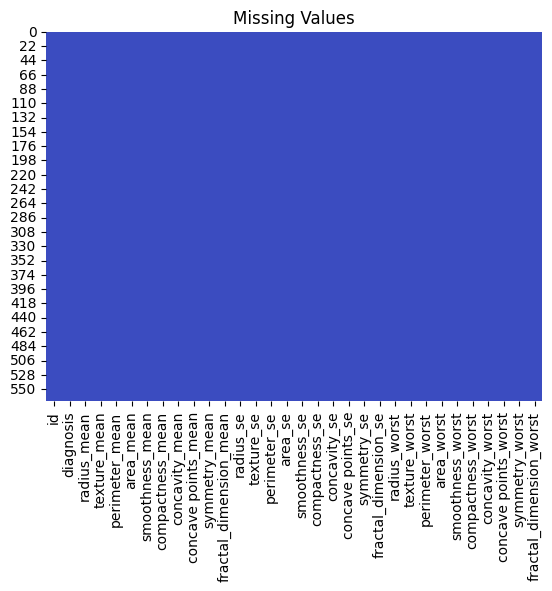

In [ ]:
sns.heatmap(df.isnull(), cmap='coolwarm', cbar=False)
plt.title('Missing Values')
plt.show()

Data Balancing:

In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
x =  df.drop(['diagnosis'],axis=1)
y = df['diagnosis']

In [ ]:
smote = SMOTE(random_state=42, k_neighbors=1)
x_sampled , y_sampled = smote.fit_resample(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
df_sampled = pd.DataFrame(x_sampled, columns=x.columns)

In [ ]:
df = pd.concat([df_sampled,y_sampled],axis=1)

In [ ]:
df['diagnosis'].value_counts()


,count
diagnosis,
M,357
B,357


Data Distribution


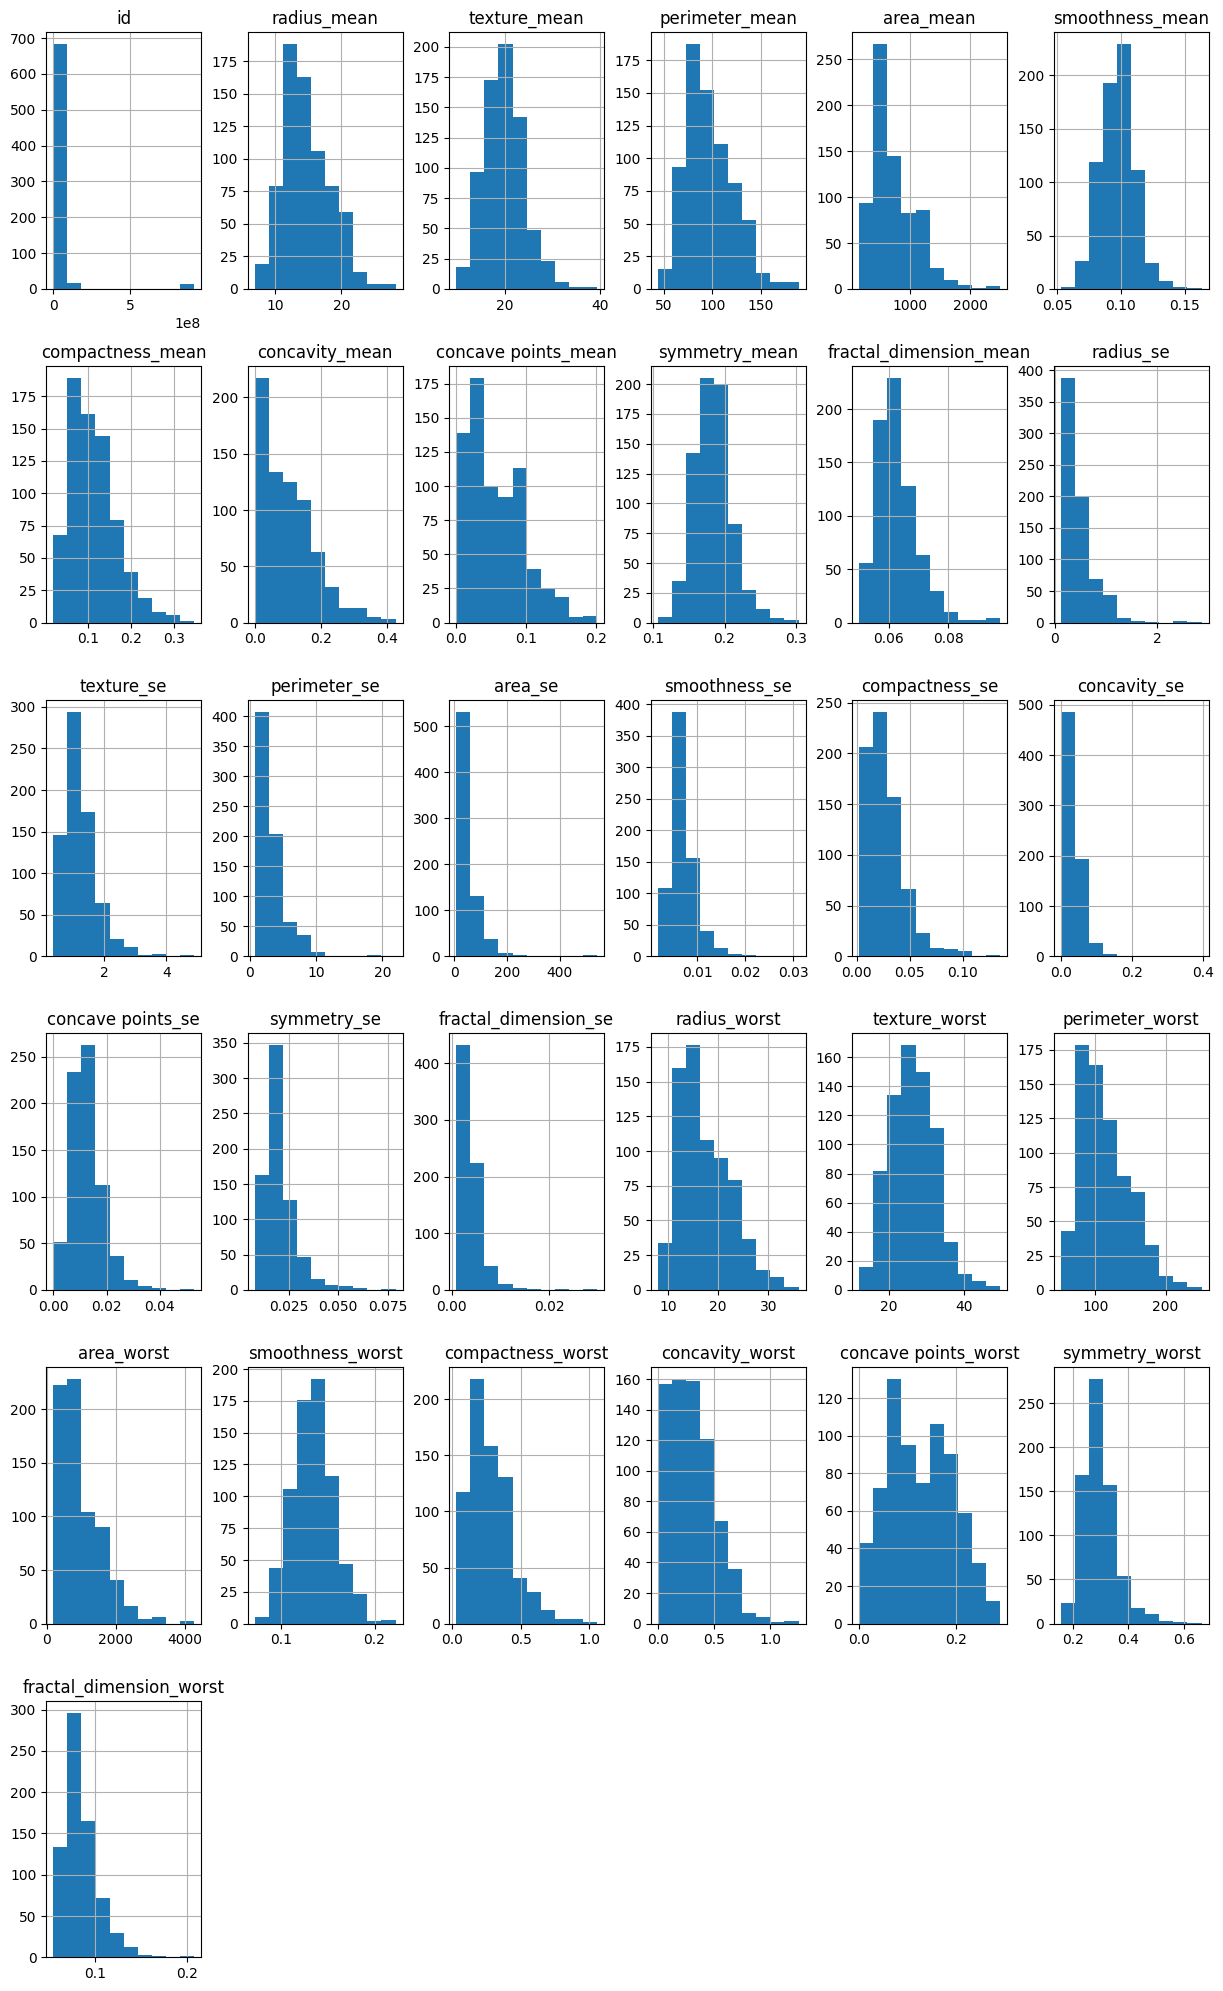

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.hist(figsize=(15, 25))
plt.show()

In [ ]:
for col in numeric_df.columns:
    print(f"Column: {col}")
    print(f"Skewness: {df[col].skew()}")
    print("-" * 40)

Column: id
Skewness: 6.19219007817667
----------------------------------------
Column: radius_mean
Skewness: 0.6282759643478169
----------------------------------------
Column: texture_mean
Skewness: 0.5338791248699629
----------------------------------------
Column: perimeter_mean
Skewness: 0.6624140942481019
----------------------------------------
Column: area_mean
Skewness: 1.2905131475609044
----------------------------------------
Column: smoothness_mean
Skewness: 0.33843486921334154
----------------------------------------
Column: compactness_mean
Skewness: 0.955290509201637
----------------------------------------
Column: concavity_mean
Skewness: 1.034892595509745
----------------------------------------
Column: concave points_mean
Skewness: 0.7836094373653505
----------------------------------------
Column: symmetry_mean
Skewness: 0.6057227436724597
----------------------------------------
Column: fractal_dimension_mean
Skewness: 1.2600869521649543
----------------------------

Encoding of Categorical Variables:

In [ ]:
le = LabelEncoder()


In [ ]:
df['diagnosis'] = le.fit_transform(df['diagnosis'])


# Visualization :

<ipython-input-251-bd894cceb146>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=data, palette='coolwarm')


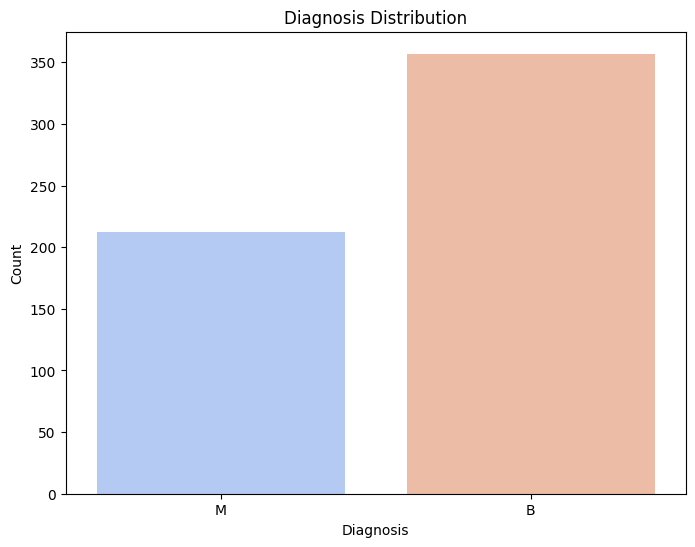

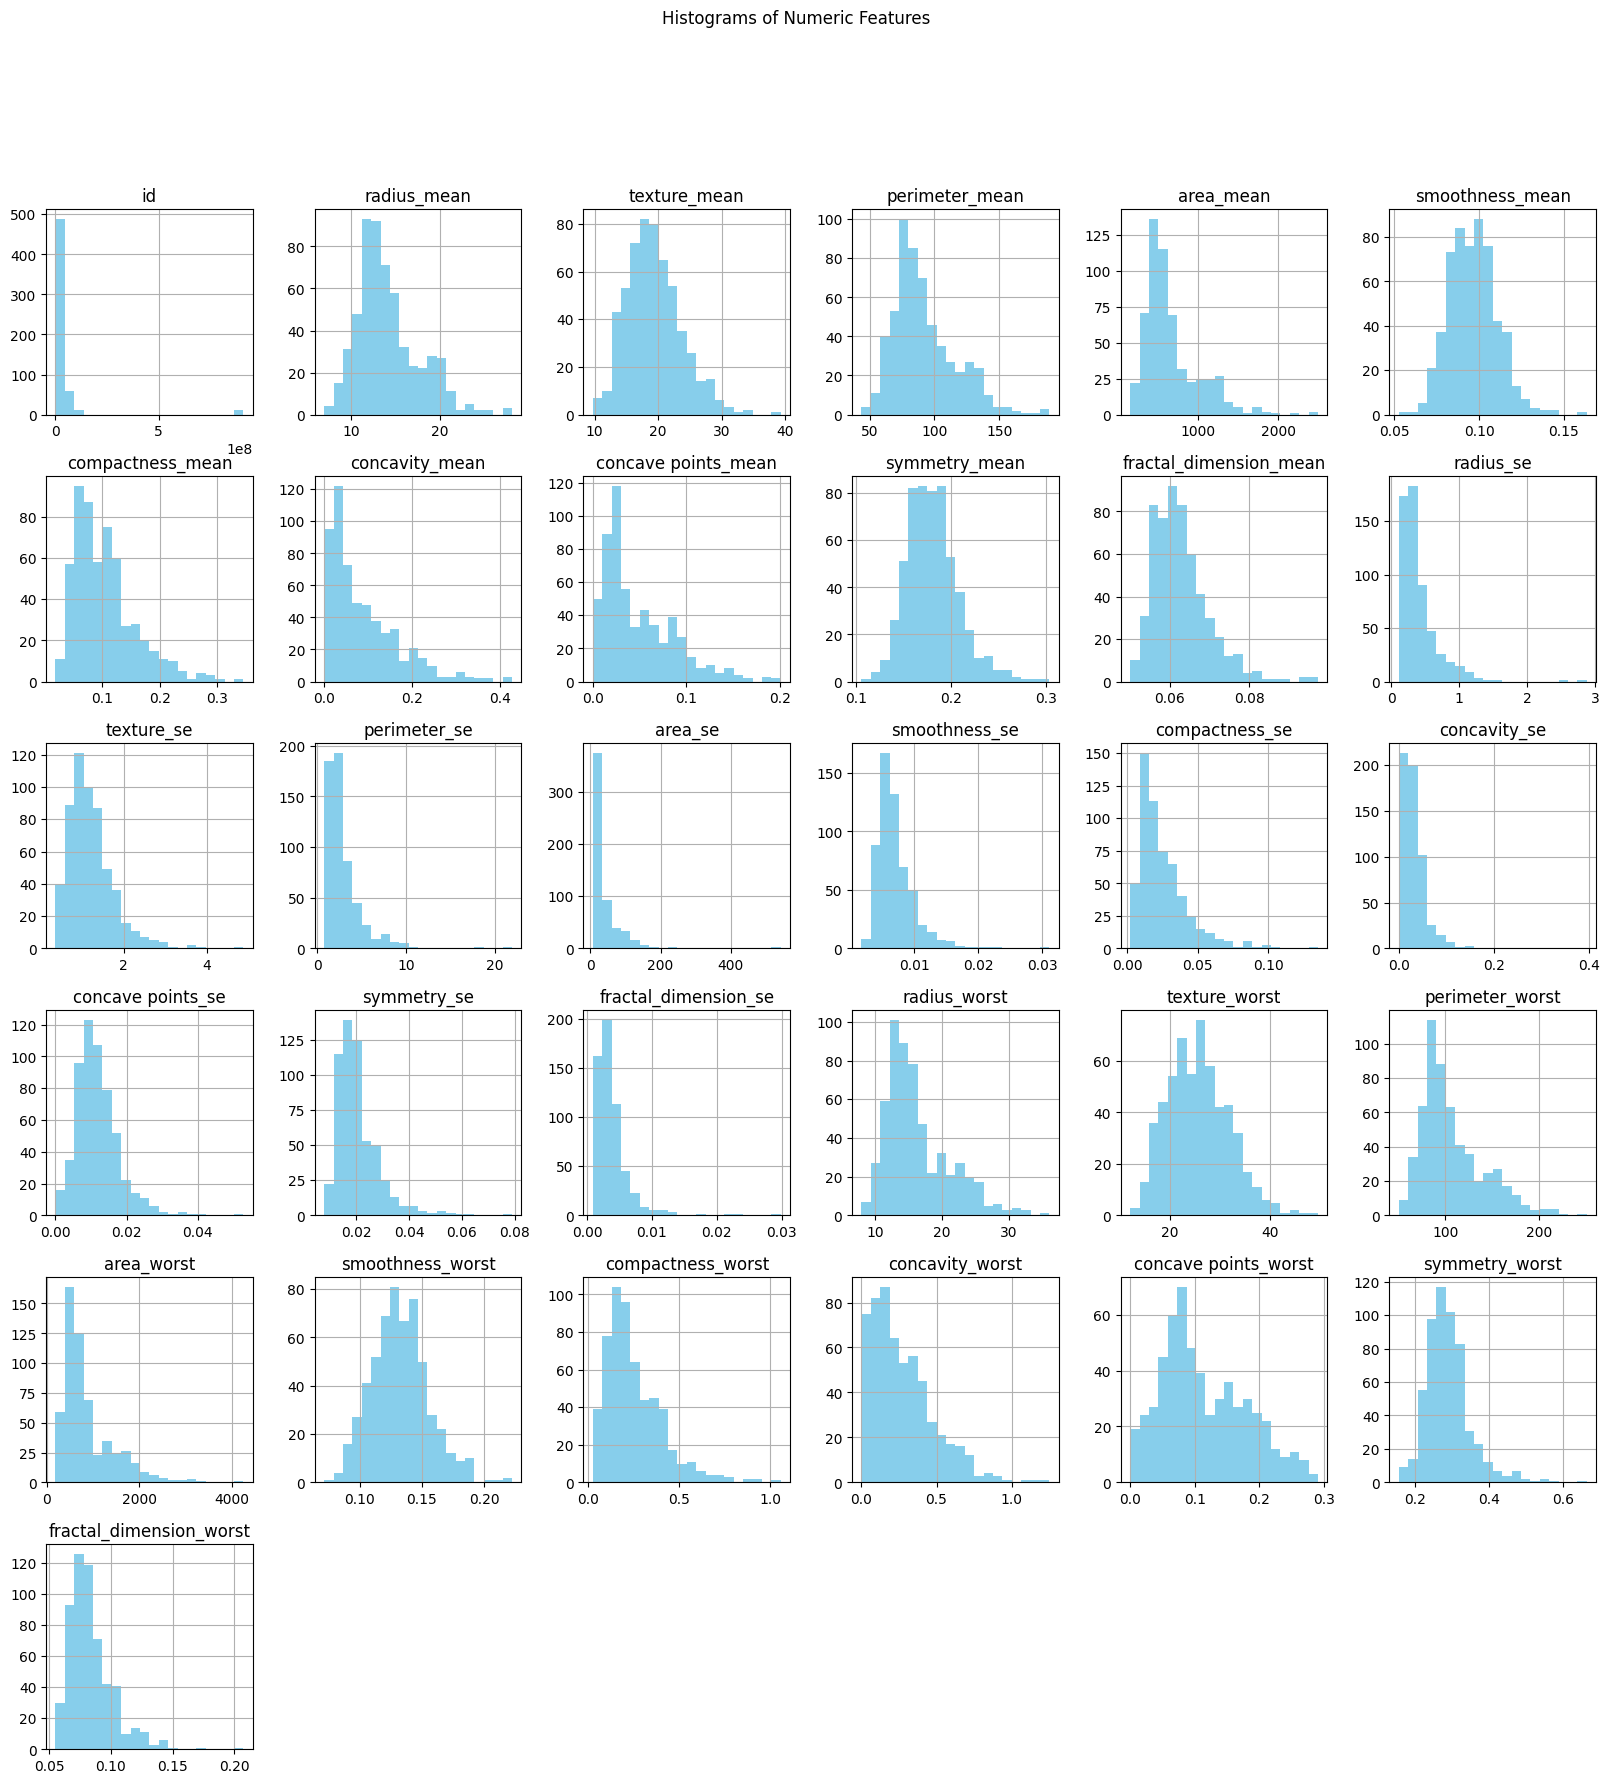

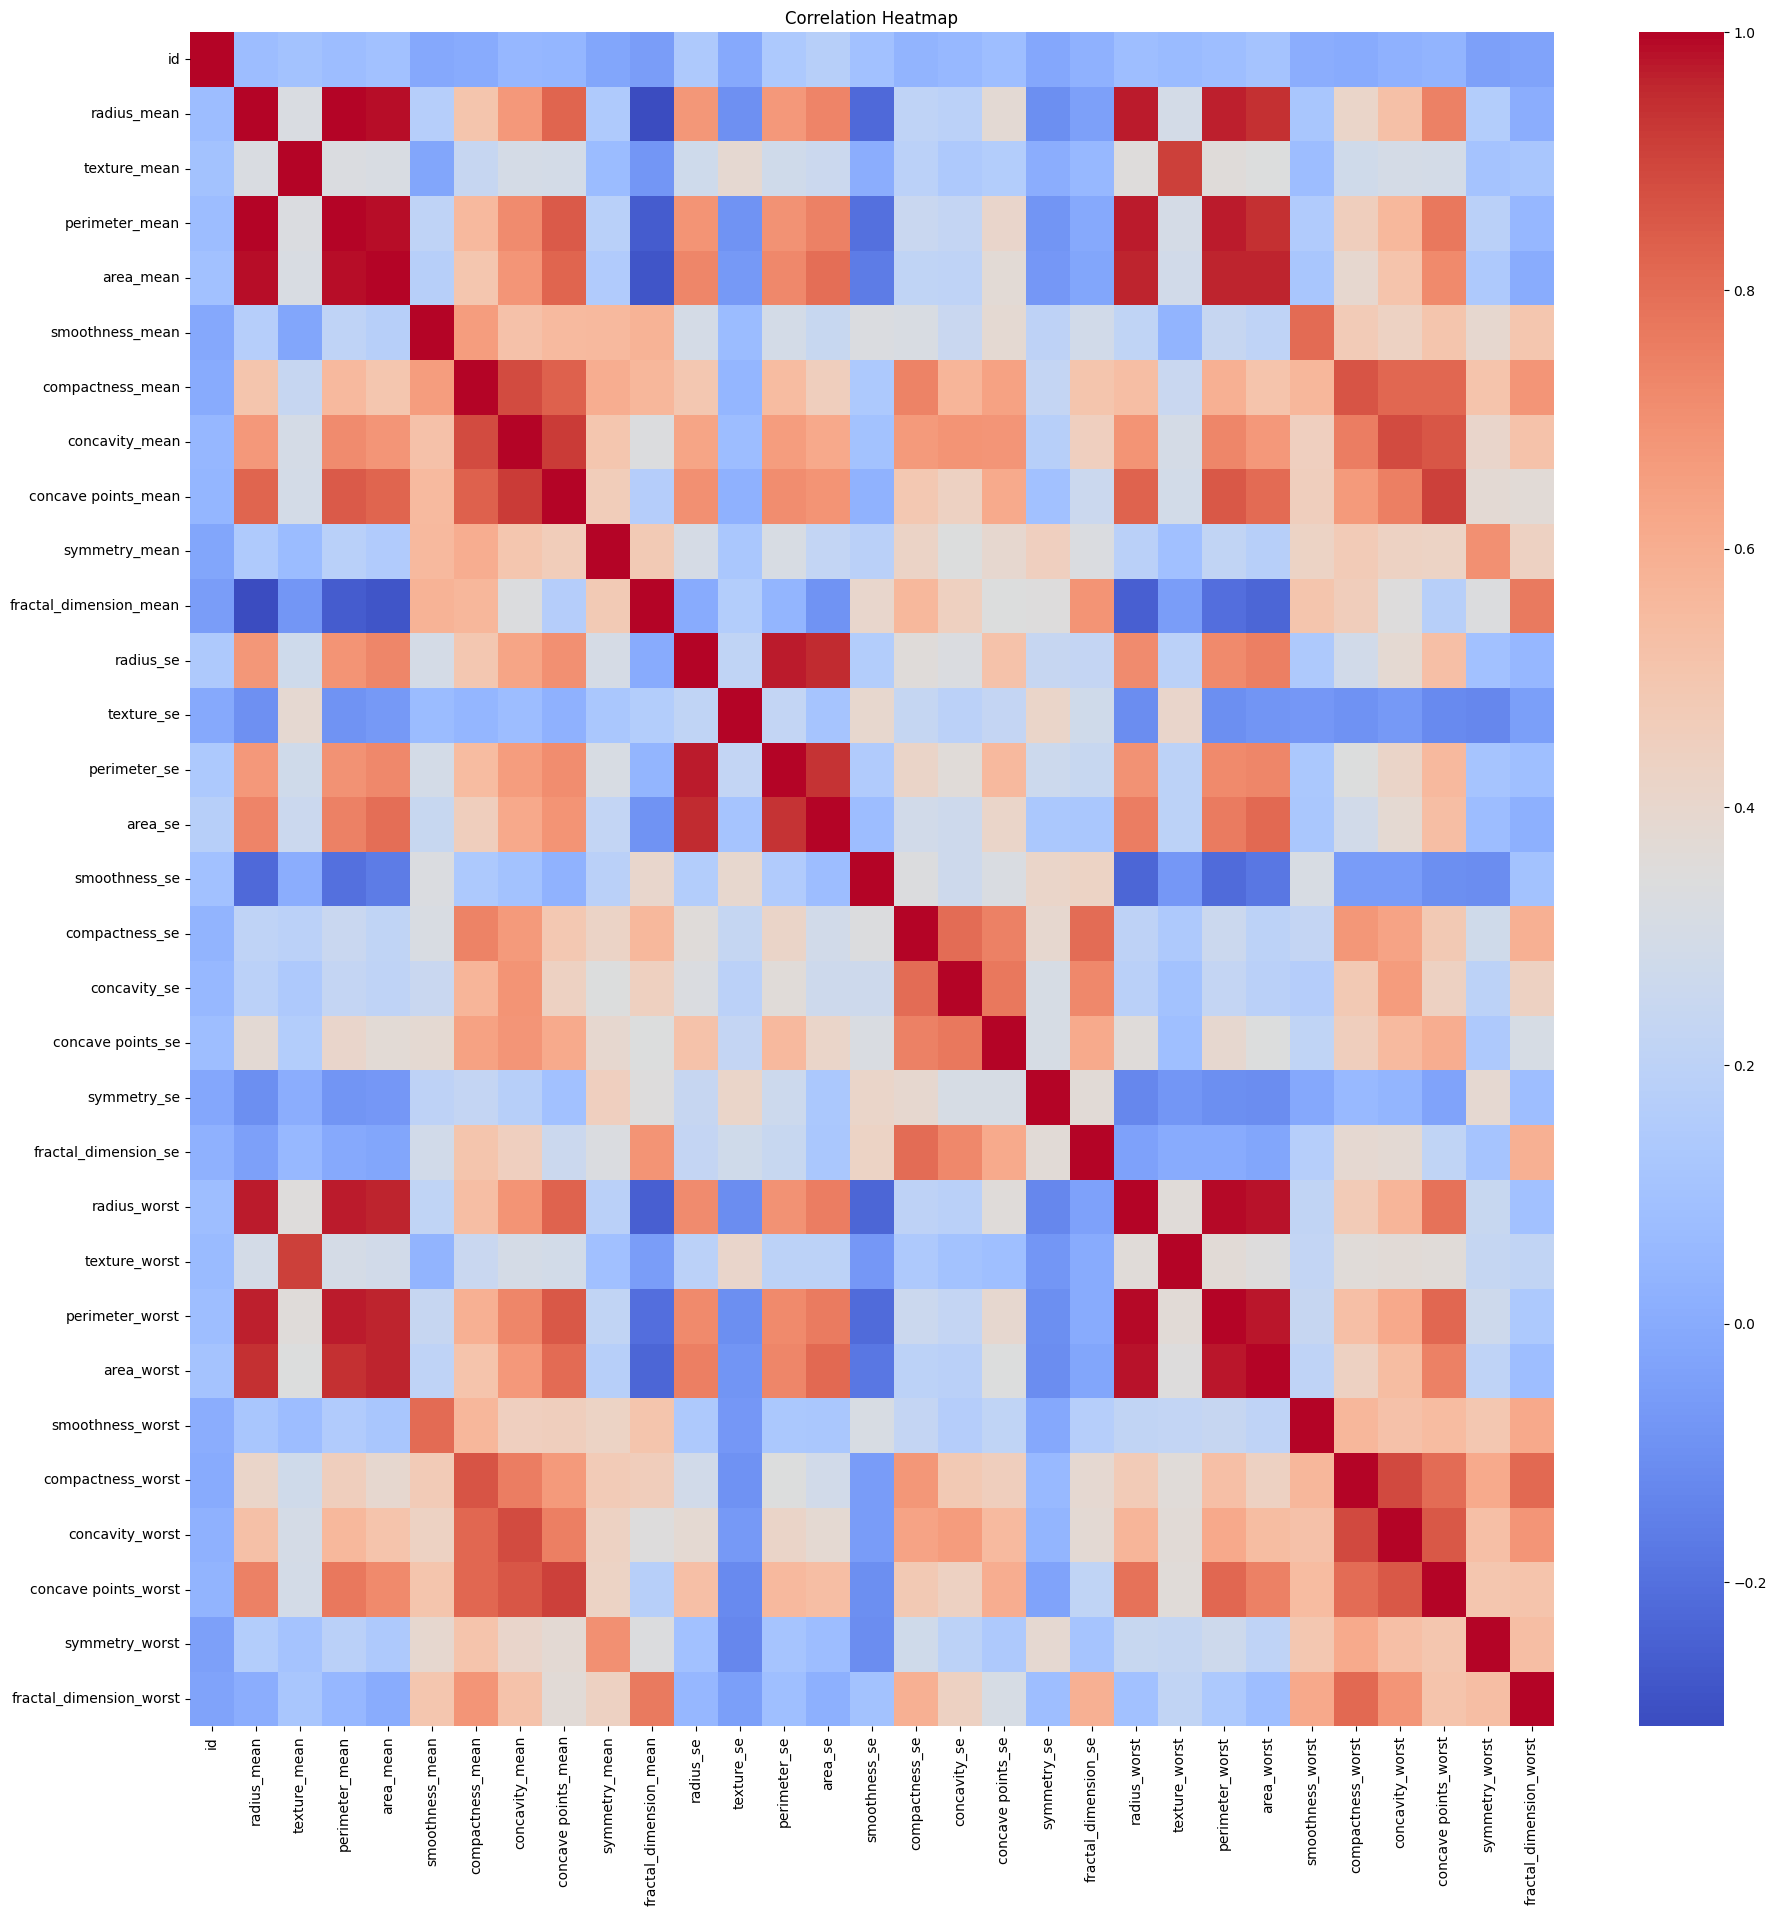

<ipython-input-251-bd894cceb146>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='radius_mean', data=data, palette='coolwarm')


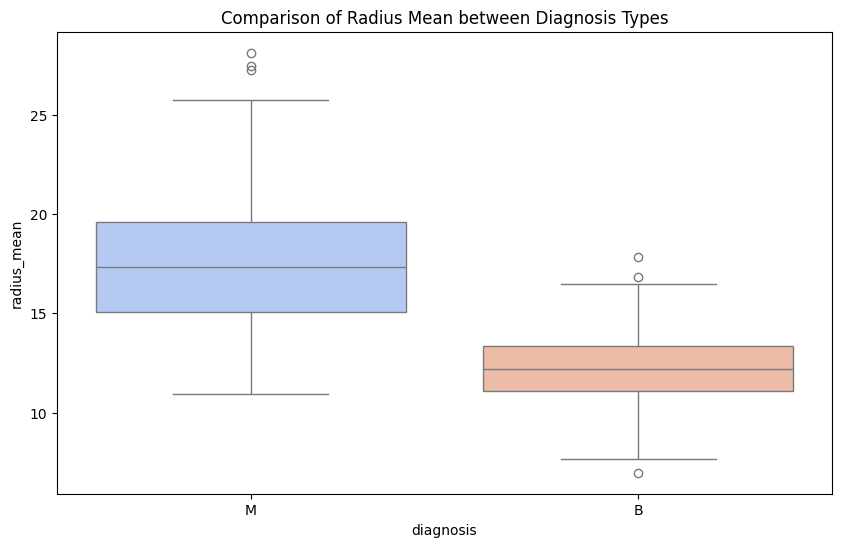

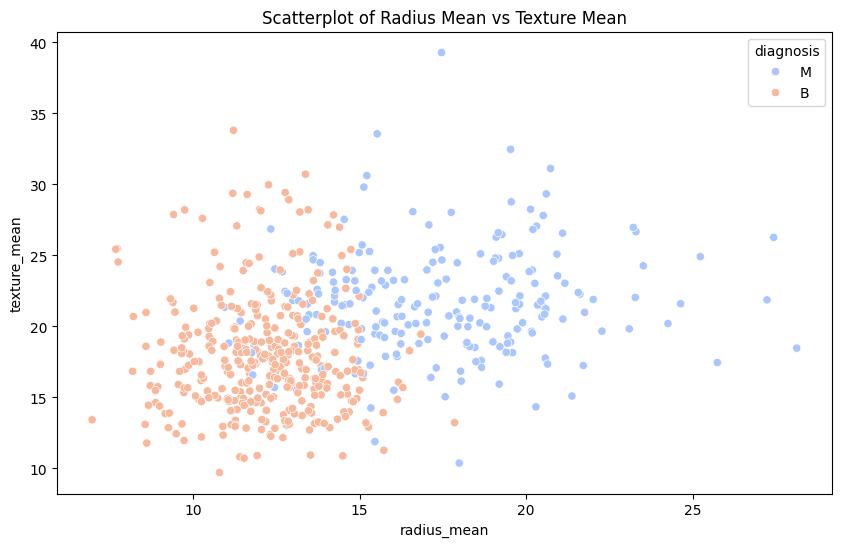

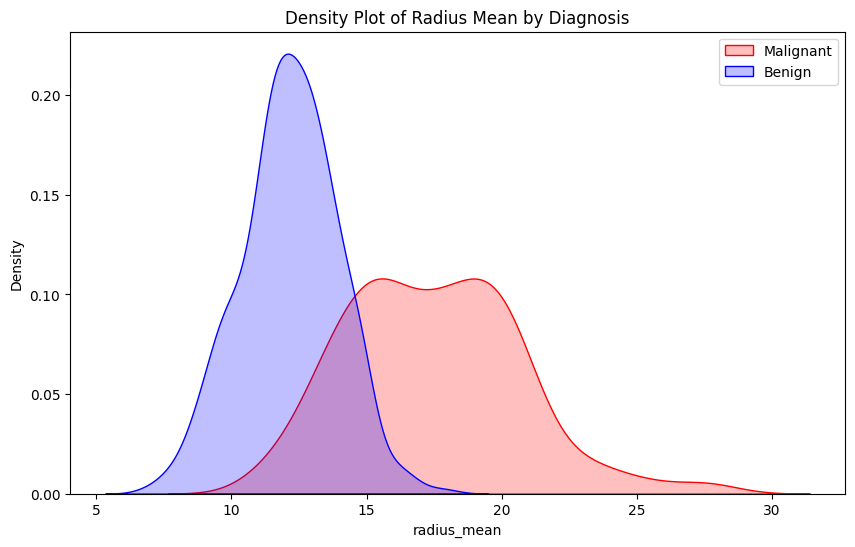

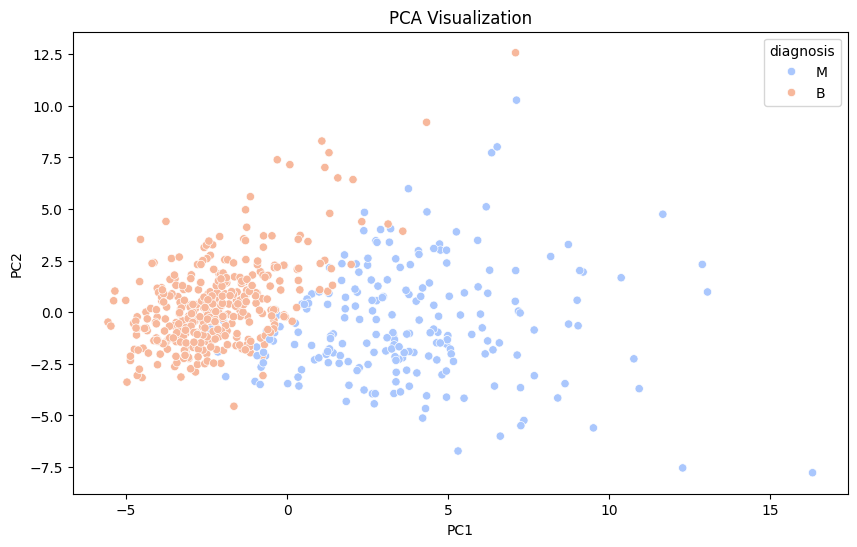

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# تحقق من البيانات وتأكد من استيرادها بشكل صحيح
# تأكد أن لديك متغير "data" الذي يحتوي على البيانات الكاملة
# على سبيل المثال:
data = pd.read_csv('/content/breast-cancer.csv')

# توزيع التشخيص
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=data, palette='coolwarm')
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# اختيار البيانات الرقمية فقط
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# عرض الرسوم البيانية للميزات الرقمية
numeric_data.hist(bins=20, figsize=(20, 20), color='skyblue')
plt.suptitle('Histograms of Numeric Features')
plt.show()

# رسم خريطة الارتباط
correlation = numeric_data.corr()
plt.figure(figsize=(22, 22))
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# رسم Boxplot للمقارنة بين الأنواع
plt.figure(figsize=(10, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=data, palette='coolwarm')
plt.title('Comparison of Radius Mean between Diagnosis Types')
plt.show()

# رسم Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=data, palette='coolwarm')
plt.title('Scatterplot of Radius Mean vs Texture Mean')
plt.show()

# رسم Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data[data['diagnosis'] == 'M']['radius_mean'], label='Malignant', fill=True, color='red')
sns.kdeplot(data=data[data['diagnosis'] == 'B']['radius_mean'], label='Benign', fill=True, color='blue')
plt.title('Density Plot of Radius Mean by Diagnosis')
plt.legend()
plt.show()

# تطبيق PCA للرؤية ثنائية الأبعاد
features = numeric_data.drop(columns=['id'], errors='ignore')  # تجاهل العمود إذا لم يكن موجودًا
features_scaled = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['diagnosis'] = data['diagnosis']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=pca_df, palette='coolwarm')
plt.title('PCA Visualization')
plt.show()


Scaling:

In [ ]:
x= df.drop(['diagnosis'],axis=1)
y= df['diagnosis']

In [ ]:
from sklearn.preprocessing import StandardScaler

# تعريف StandardScaler
scaler = StandardScaler()

# تطبيق التحجيم على البيانات
x_scaled = scaler.fit_transform(x)


In [ ]:
x_scaled = scaler.fit_transform(x)


Data Splitting

In [ ]:
x_train , x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)


Hyperparameter Tuning:

In [ ]:
# Define parameter grids
param_grids = {
    'LogisticRegression': {
        'C': np.logspace(-4, 4, 20),
        'solver': ['lbfgs', 'liblinear'],
    },
    'SVC': {
        'C': np.logspace(-4, 4, 20),
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'GradientBoostingClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # Manhattan or Euclidean distance
    },
    'XGBClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'gamma': [0, 0.1, 0.2]
    }
}

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVC': SVC(probability=True),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# تحميل البيانات
data = load_breast_cancer()
X = data.data
y = data.target

# تقسيم البيانات
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# تحجيم البيانات
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# تعريف النماذج
models = {
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

# تعريف الشبكة
param_grids = {
    'LogisticRegression': {
        'C': np.logspace(-4, 4, 10),
        'solver': ['liblinear', 'lbfgs']
    },
    'SVC': {
        'C': np.logspace(-4, 4, 10),
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'RandomForestClassifier': {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
}

# البحث عن أفضل المعلمات
best_models = {}

for model_name, model in models.items():
    print(f"Running RandomizedSearchCV for {model_name}...")
    param_grid = param_grids[model_name]
    randomized_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=20,
        scoring='accuracy',
        cv=5,
        verbose=1,
        random_state=42,
        n_jobs=-1
    )
    randomized_search.fit(x_train, y_train)
    best_models[model_name] = randomized_search.best_estimator_
    print(f"Best parameters for {model_name}: {randomized_search.best_params_}")


Running RandomizedSearchCV for LogisticRegression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for LogisticRegression: {'solver': 'liblinear', 'C': 0.046415888336127774}
Running RandomizedSearchCV for SVC...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for SVC: {'kernel': 'rbf', 'gamma': 'scale', 'C': 2.782559402207126}
Running RandomizedSearchCV for RandomForestClassifier...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for RandomForestClassifier: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Running RandomizedSearchCV for KNeighborsClassifier...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for KNeighborsClassifier: {'weights': 'uniform', 'p': 1, 'n_neighbors': 3}


In [ ]:
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name}...")
    y_pred = model.predict(x_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



Evaluating LogisticRegression...
Accuracy: 0.9883
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.99      0.99      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171


Evaluating SVC...
Accuracy: 0.9825
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


Evaluating RandomForestClassifier...
Accuracy: 0.9649
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96   

In [ ]:
LR = LogisticRegression(solver = 'lbfgs', C = 0.23357214690901212)
svc = SVC(kernel = 'rbf', gamma = 'scale', C = 11.288378916846883)
RF = RandomForestClassifier(n_estimators = 50, min_samples_split = 2, min_samples_leaf = 1, max_depth = 30)
GB = GradientBoostingClassifier(n_estimators = 50, max_depth = 3, learning_rate = 0.2)
KNN = KNeighborsClassifier(weights = 'distance', p = 2, n_neighbors = 5)
xgb = XGBClassifier(n_estimators = 50, max_depth = 3, learning_rate = 0.2, gamma= 0)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier  # تحتاج إلى تثبيت xgboost باستخدام pip إذا لم يكن مثبتًا
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, classification_report

# تحميل البيانات
data = load_breast_cancer()
X = data.data
y = data.target

# تقسيم البيانات
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# تحجيم البيانات
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# تعريف النماذج
LR = LogisticRegression()
svc = SVC()
RF = RandomForestClassifier()
GB = GradientBoostingClassifier()
KNN = KNeighborsClassifier()
xgb = XGBClassifier()

# تدريب النماذج
LR.fit(x_train, y_train)
svc.fit(x_train, y_train)
RF.fit(x_train, y_train)
GB.fit(x_train, y_train)
KNN.fit(x_train, y_train)
xgb.fit(x_train, y_train)

# التنبؤ واختبار النماذج
models = {'Logistic Regression': LR, 'SVC': svc, 'Random Forest': RF,
          'Gradient Boosting': GB, 'KNeighbors': KNN, 'XGBClassifier': xgb}

for model_name, model in models.items():
    y_pred = model.predict(x_test)
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")



Model: Logistic Regression
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


Model: SVC
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


Model: Random Forest
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    ac

In [ ]:
LR_pred = LR.predict(x_test)
svc_pred = svc.predict(x_test)
RF_pred = RF.predict(x_test)
GB_pred = GB.predict(x_test)
KNN_pred = KNN.predict(x_test)
xgb_pred = xgb.predict(x_test)

In [ ]:
ac_LR = accuracy_score(y_test, LR_pred)
ac_svc = accuracy_score(y_test, svc_pred)
ac_RF = accuracy_score(y_test, RF_pred)
ac_GB = accuracy_score(y_test, GB_pred)
ac_KNN = accuracy_score(y_test, KNN_pred)
ac_xgb = accuracy_score(y_test, xgb_pred)

In [ ]:
print(f"Accuracy of Logistic Regression: {ac_LR:.4f}")
print(f"Accuracy of SVC: {ac_svc:.4f}")
print(f"Accuracy of Random Forest: {ac_RF:.4f}")
print(f"Accuracy of Gradient Boosting Tree: {ac_GB:.4f}")
print(f"Accuracy of K-Nearest Neighbor: {ac_KNN:.4f}")
print(f"Accuracy of XGBoost: {ac_xgb:.4f}")

Accuracy of Logistic Regression: 0.9825
Accuracy of SVC: 0.9766
Accuracy of Random Forest: 0.9708
Accuracy of Gradient Boosting Tree: 0.9591
Accuracy of K-Nearest Neighbor: 0.9591
Accuracy of XGBoost: 0.9708


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# تحميل البيانات
data = load_breast_cancer()
X = data.data
y = data.target

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# تحجيم البيانات
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# أنواع الـ kernels للتجربة
kernels = ['linear', 'rbf', 'poly']

# اختبار كل kernel باستخدام SVC
for kernel in kernels:
    print(f"\nTesting kernel: {kernel}")
    svc = SVC(kernel=kernel, C=1, gamma='scale', random_state=42)  # يمكنك تعديل C و gamma إذا أردت
    svc.fit(X_train, y_train)  # تدريب النموذج
    y_pred = svc.predict(X_test)  # التنبؤ
    accuracy = accuracy_score(y_test, y_pred)  # حساب الدقة
    print(f"Accuracy for kernel {kernel}: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



Testing kernel: linear
Accuracy for kernel linear: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


Testing kernel: rbf
Accuracy for kernel rbf: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


Testing kernel: poly
Accuracy for kernel poly: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        63
       

Evaluation :

Classification Report :

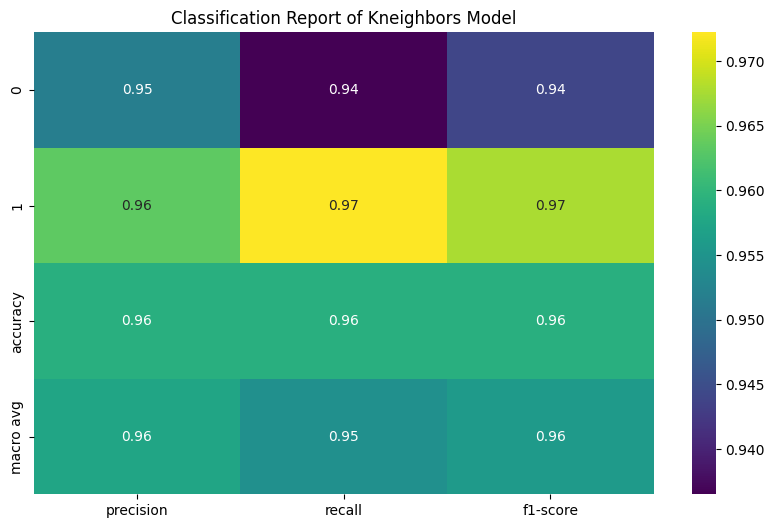

In [ ]:
KN_report = classification_report(y_test, KNN_pred, output_dict=True)
# Convert the classification report to a DataFrame
KN_report_df = pd.DataFrame(KN_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(KN_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Kneighbors Model")
plt.show()

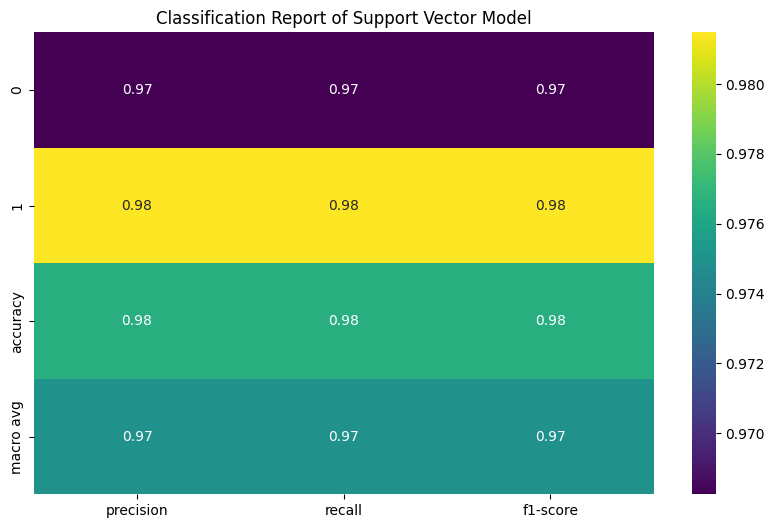

In [ ]:
svc_report = classification_report(y_test, svc_pred, output_dict=True)
# Convert the classification report to a DataFrame
svc_report_df = pd.DataFrame(svc_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(svc_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Support Vector Model")
plt.show()

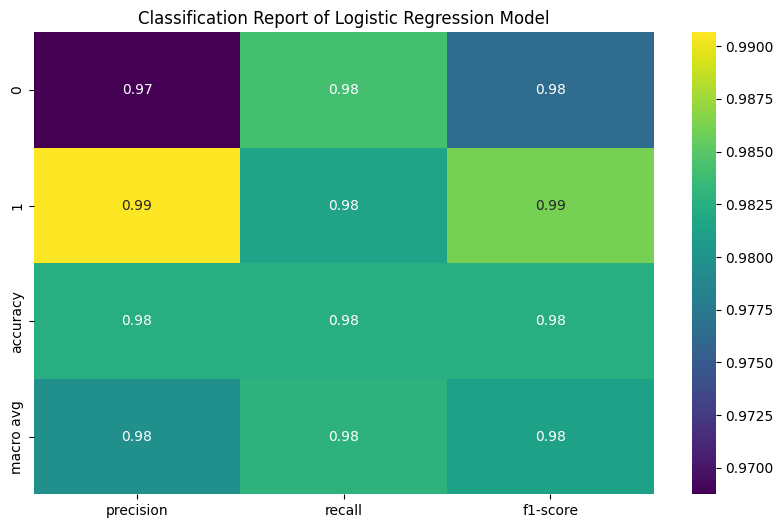

In [ ]:
LR_report = classification_report(y_test, LR_pred, output_dict=True)
# Convert the classification report to a DataFrame
LR_report_df = pd.DataFrame(LR_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(LR_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Logistic Regression Model")
plt.show()

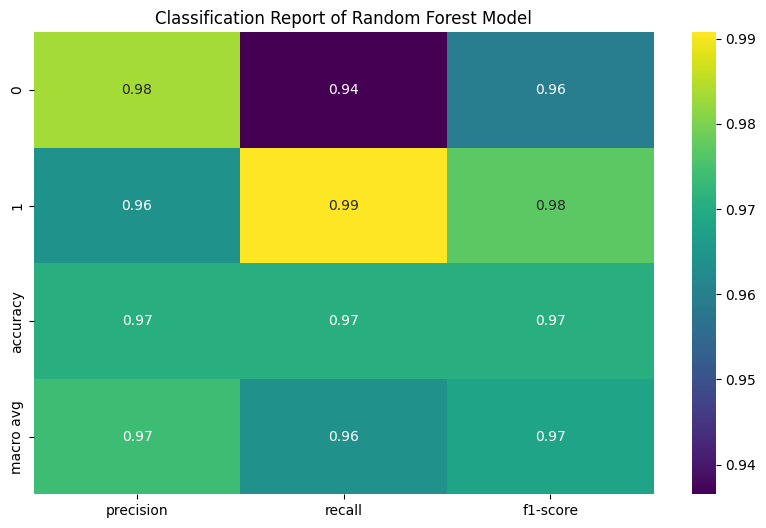

In [ ]:
RF_report = classification_report(y_test, RF_pred, output_dict=True)
# Convert the classification report to a DataFrame
RF_report_df = pd.DataFrame(RF_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(RF_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Random Forest Model")
plt.show()

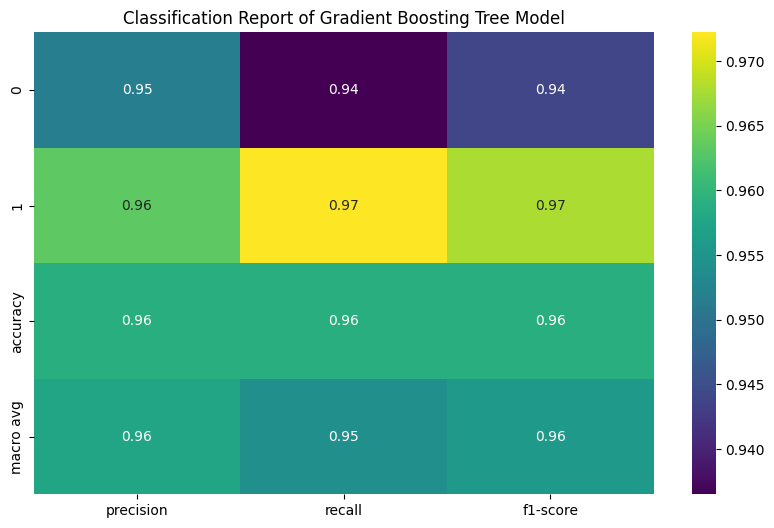

In [ ]:
GB_report = classification_report(y_test, GB_pred, output_dict=True)
# Convert the classification report to a DataFrame
GB_report_df = pd.DataFrame(GB_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(GB_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Gradient Boosting Tree Model")
plt.show()


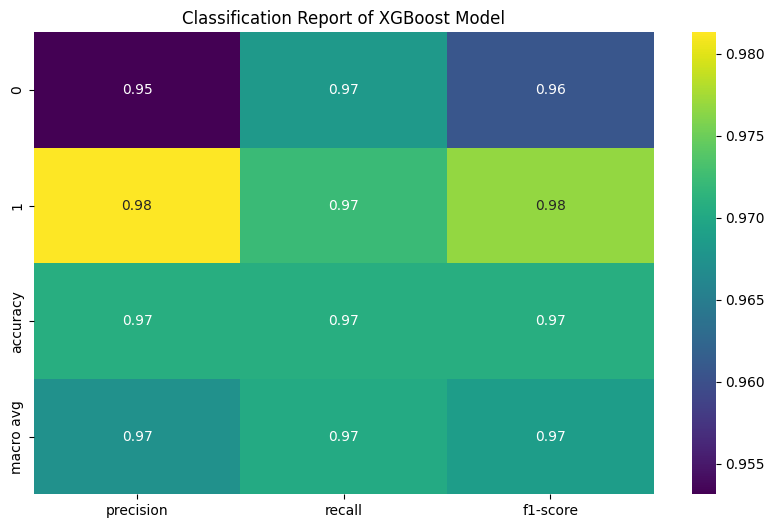

In [ ]:
xgb_report = classification_report(y_test, xgb_pred, output_dict=True)
# Convert the classification report to a DataFrame
xgb_report_df = pd.DataFrame(xgb_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(xgb_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of XGBoost Model")
plt.show()

ROC-Curve

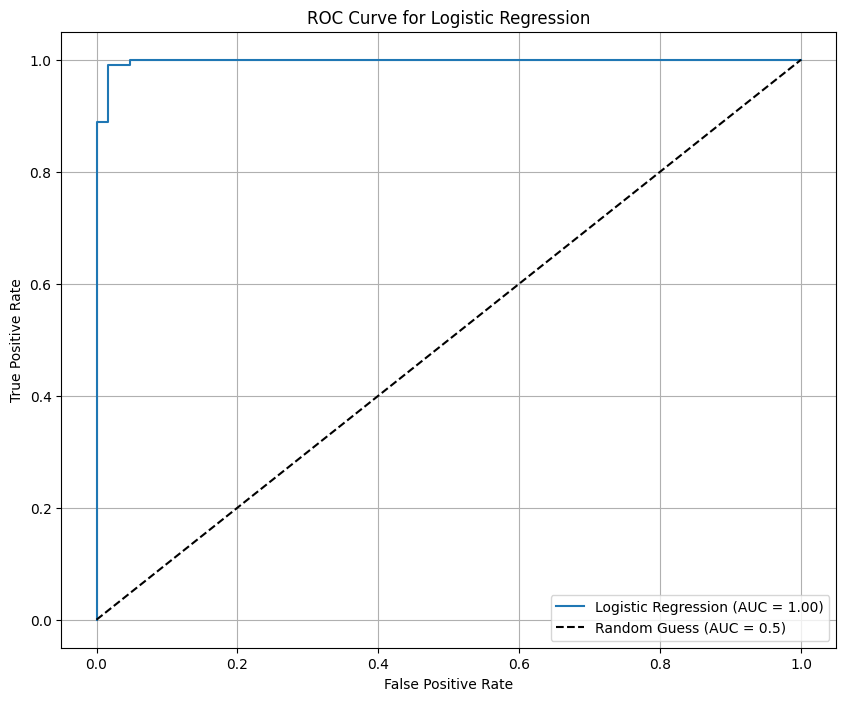

Overall ROC AUC for Logistic Regression: 0.9979


In [ ]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_score = LR.predict_proba(x_test)[:, 1]  # Probabilities for the positive class (index 1)

# Compute the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score)  # No need to binarize y_test for binary classification
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print the overall AUC
print(f"Overall ROC AUC for Logistic Regression: {roc_auc:.4f}")

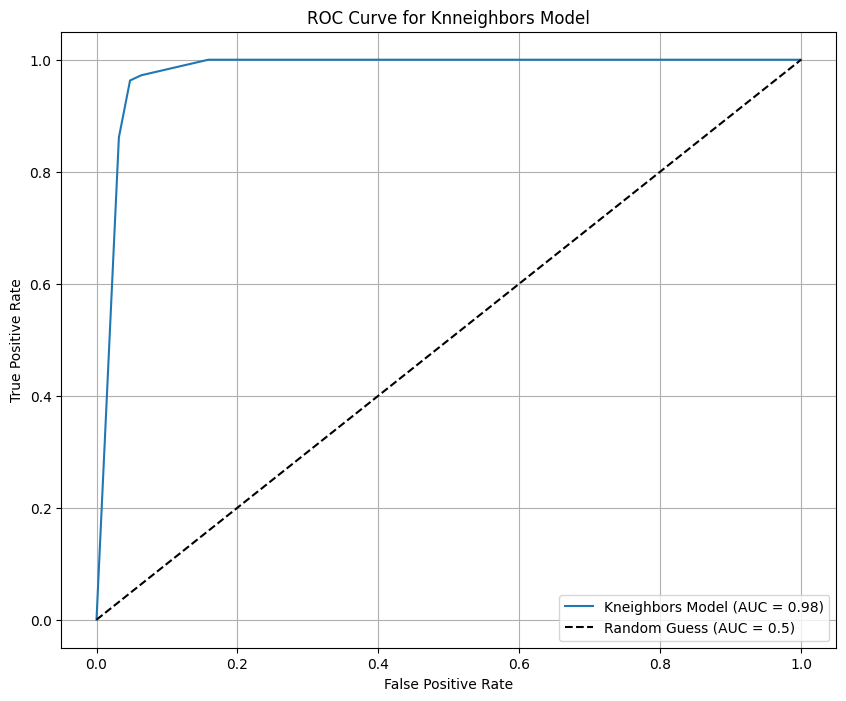

Overall ROC AUC for Kneighbors Model: 0.9787


In [ ]:
# Get the predicted probabilities for the positive class
y_score = KNN.predict_proba(x_test)[:, 1]  # Probabilities for the positive class (index 1)

# Compute the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score)  # No need to binarize y_test for binary classification
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"Kneighbors Model (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Knneighbors Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print the overall AUC
print(f"Overall ROC AUC for Kneighbors Model: {roc_auc:.4f}")

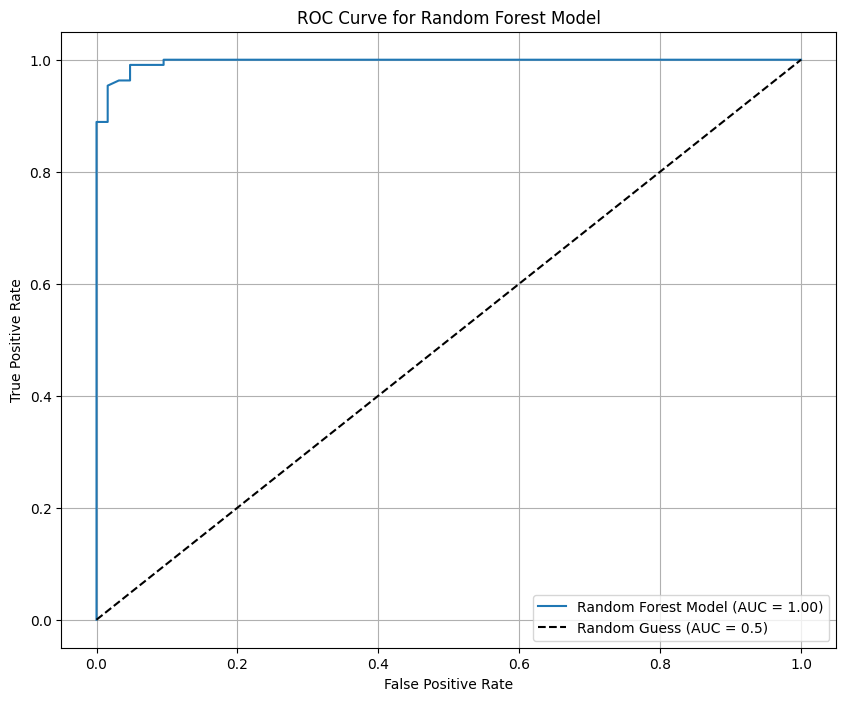

Overall ROC AUC for Random Forest Model: 0.9965


In [ ]:
# Get the predicted probabilities for the positive class
y_score = RF.predict_proba(x_test)[:, 1]  # Probabilities for the positive class (index 1)

# Compute the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score)  # No need to binarize y_test for binary classification
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"Random Forest Model (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print the overall AUC
print(f"Overall ROC AUC for Random Forest Model: {roc_auc:.4f}")

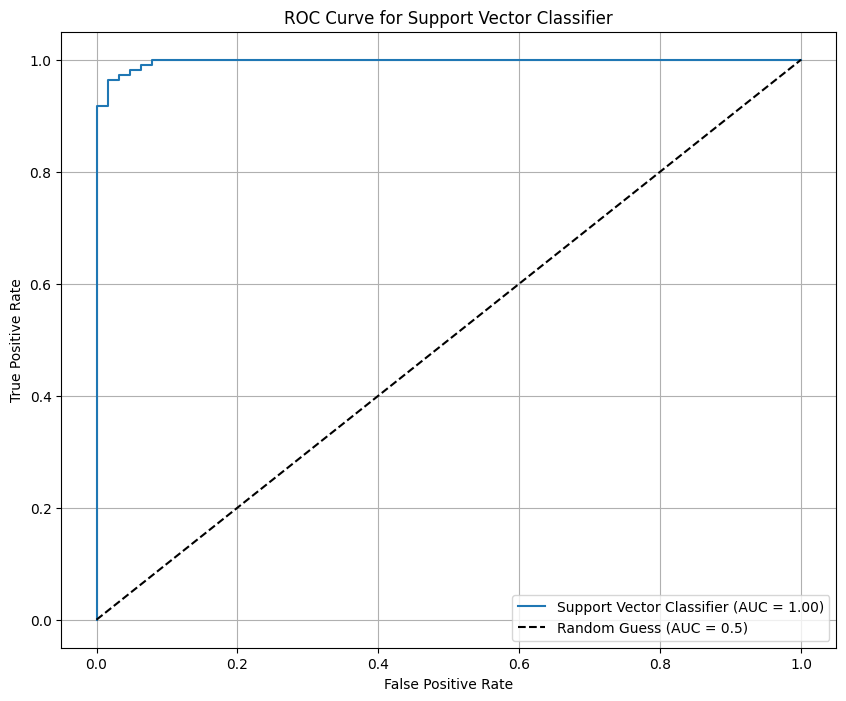

Overall ROC AUC for Support Vector Classifier Model: 0.9972


In [ ]:
# Get the decision scores for the positive class
y_score = svc.decision_function(x_test)  # Decision function outputs for binary classification

# Compute the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score)  # No need to binarize y_test for binary classification
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"Support Vector Classifier (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Support Vector Classifier")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print the overall AUC
print(f"Overall ROC AUC for Support Vector Classifier Model: {roc_auc:.4f}")

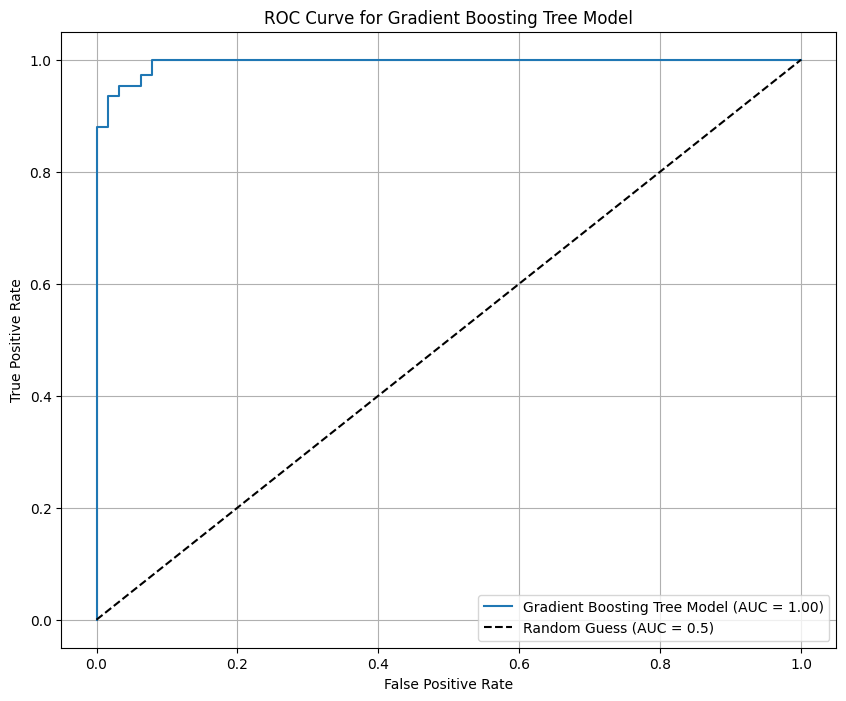

Overall ROC AUC for Gradient Boosting Tree Model: 0.9951


In [ ]:
# Get the predicted probabilities for the positive class
y_score = GB.predict_proba(x_test)[:, 1]  # Probabilities for the positive class (index 1)

# Compute the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score)  # No need to binarize y_test for binary classification
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"Gradient Boosting Tree Model (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Gradient Boosting Tree Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print the overall AUC
print(f"Overall ROC AUC for Gradient Boosting Tree Model: {roc_auc:.4f}")

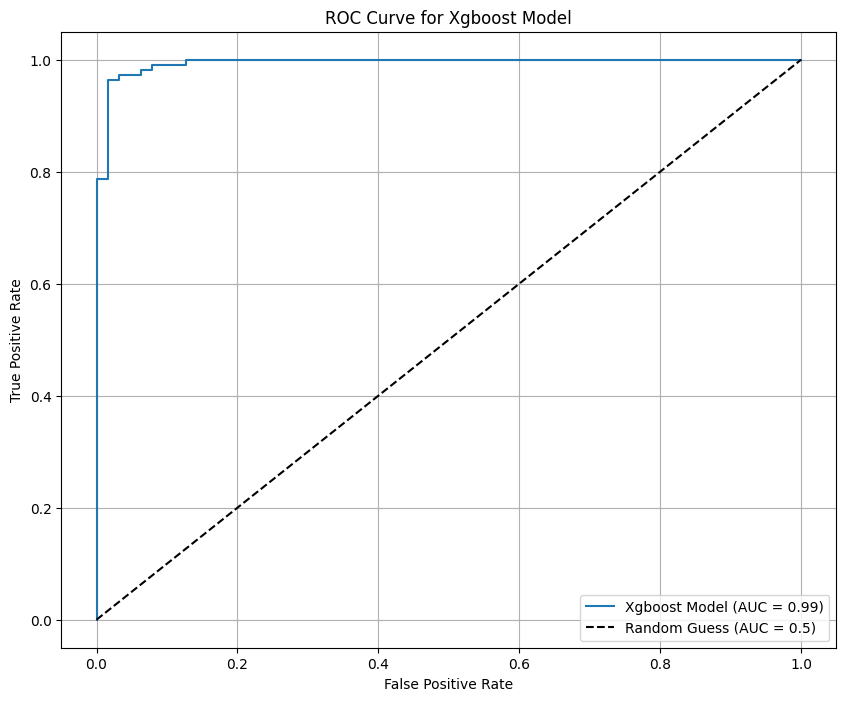

Overall ROC AUC for XGBoost Model: 0.9944


In [ ]:
# Get the predicted probabilities for the positive class
y_score = xgb.predict_proba(x_test)[:, 1]  # Probabilities for the positive class (index 1)

# Compute the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score)  # No need to binarize y_test for binary classification
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"Xgboost Model (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Xgboost Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print the overall AUC
print(f"Overall ROC AUC for XGBoost Model: {roc_auc:.4f}")

Accuracy Comparison :

In [ ]:
models = {
    'Logistic Regression': LR,
    'Random Forest': RF,
    'SVM': svc,
    'Gradient Boosting Tree': GB,
    'Kneighbors Classifier': KNN,
    'Xgboost':xgb
}

<ipython-input-280-e037617dee7f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")


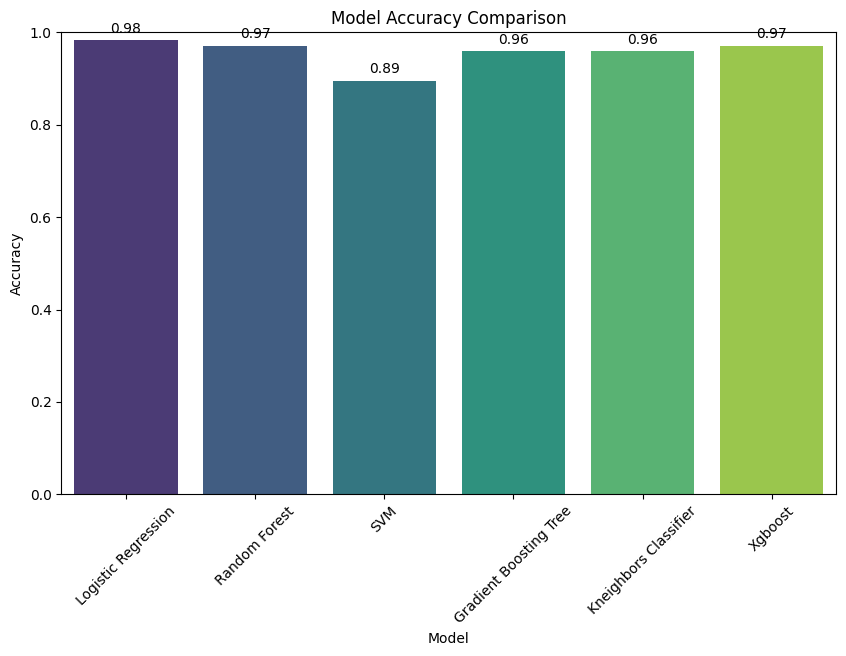

In [ ]:
accuracies = {}

for model_name, model in models.items():
    y_test_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    accuracies[model_name] = accuracy

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")

for i, (model_name, accuracy) in enumerate(accuracies.items()):
    plt.text(i, accuracy + 0.01, f"{accuracy:.2f}", ha='center', va='bottom', fontsize=10)

plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

In [ ]:
!pip install joblib

In [ ]:
from joblib import dump

In [ ]:
dump(LR, 'LR.joblib')
dump(svc, 'svc.joblib')
dump(svc, 'linear.joblib')
dump(svc, 'rbf.joblib')
dump(svc, 'poly.joblib')
dump(RF, 'RF.joblib')
dump(GB, 'GB.joblib')
dump(KNN, 'KNN.joblib')
'linear', 'rbf', 'poly'

('linear', 'rbf', 'poly')

In [ ]:
from flask import Flask, request, jsonify
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib  # لتحميل النموذج المدرب

# تحميل النموذج المدرب
model = joblib.load("svc.joblib")  # استبدل باسم ملف النموذج الخاص بك

# إنشاء تطبيق Flask
app = Flask(__name__)

# تعريف نقطة نهاية للتحقق من صحة الخدمة
@app.route('/')
def home():
    return "Breast Cancer Prediction API is running!"

# تعريف نقطة نهاية للتنبؤ
@app.route('/predict', methods=['POST'])
def predict():
    # استلام البيانات من الطلب
    data = request.json  # البيانات يتم إرسالها بصيغة JSON
    try:
        # تحويل البيانات إلى DataFrame
        df = pd.DataFrame([data])

        # معالجة البيانات (تحجيم/تطبيق PCA)
        scaler = StandardScaler()
        features = scaler.fit_transform(df)  # استبدل `df` بأعمدتك المناسبة إذا لزم الأمر

        # تنبؤ النموذج
        prediction = model.predict(features)
        prob = model.predict_proba(features)

        # إرجاع النتائج
        return jsonify({
            'prediction': int(prediction[0]),  # 0: Benign, 1: Malignant
            'probability': prob[0].tolist()
        })
    except Exception as e:
        return jsonify({'error': str(e)})

# تشغيل التطبيق
if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
